In [52]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [53]:
data = pd.read_csv('TravelInsurancePrediction.csv')

In [54]:
data.shape

(1987, 10)

In [55]:
data.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [56]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [57]:
data.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64

In [58]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [59]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [60]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [61]:
data.drop('Unnamed: 0',axis=1,inplace=True)

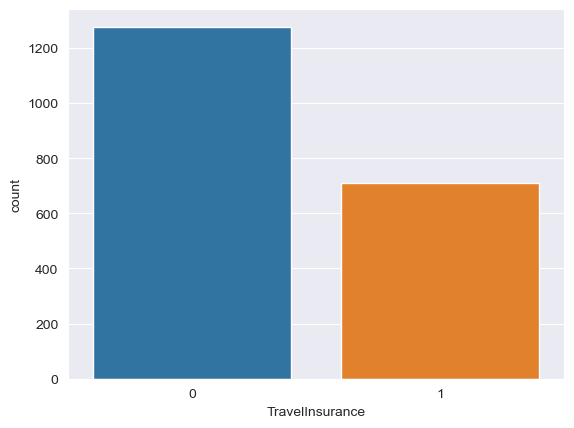

In [62]:
sns.set_style('darkgrid')
sns.countplot(data=data,x='TravelInsurance')
plt.show()

#more no-buys than buys

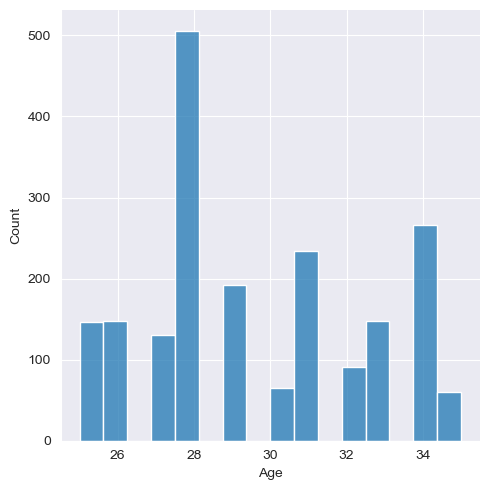

In [63]:
#Age EDA
sns.displot(data['Age'])
plt.show()

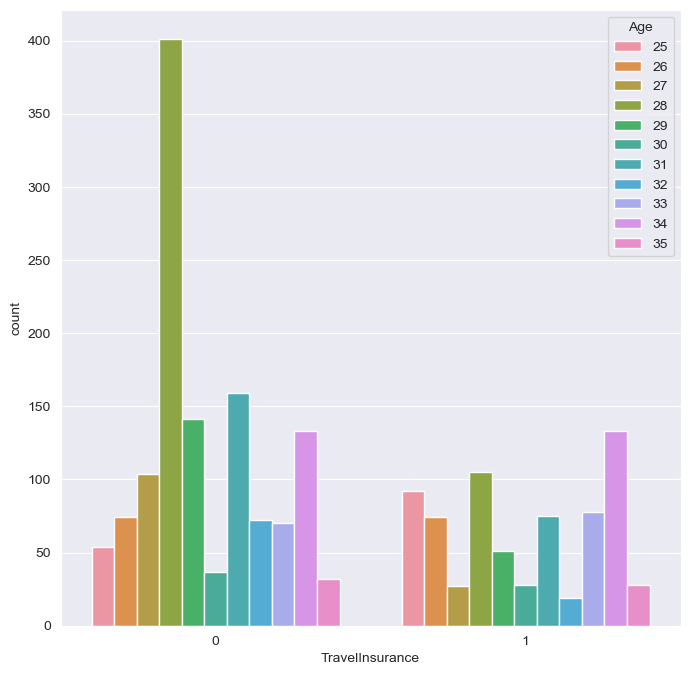

In [64]:
#breakdown of purchase by age
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Age',x='TravelInsurance',data=data)
plt.show()

#does not show clear trend, let's have a look at percentage instead

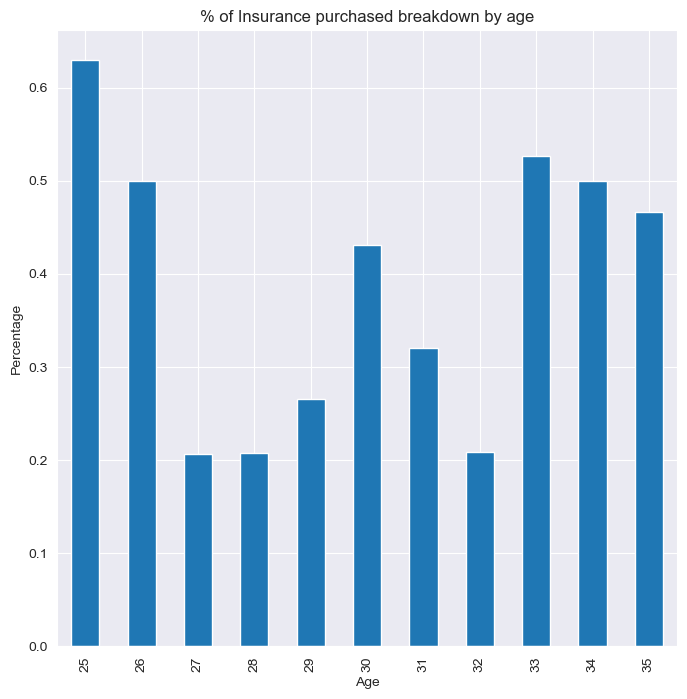

In [65]:
#percentage of purchase by age
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('Age').sum()['TravelInsurance']/data.groupby('Age').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by age')
plt.ylabel('Percentage')
plt.show()
#25 years old highest purchase %
#26, 34 50% half half
#from 27-32, % are lowest of all ages

In [66]:
data['Employment Type'].unique()

#either Government Sector or Private Sector/Self Employed

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

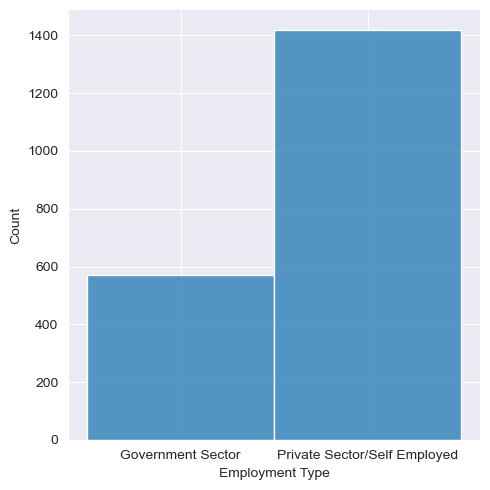

In [67]:
sns.displot(data['Employment Type'])
plt.show()

#skewed towards private sector/self employed

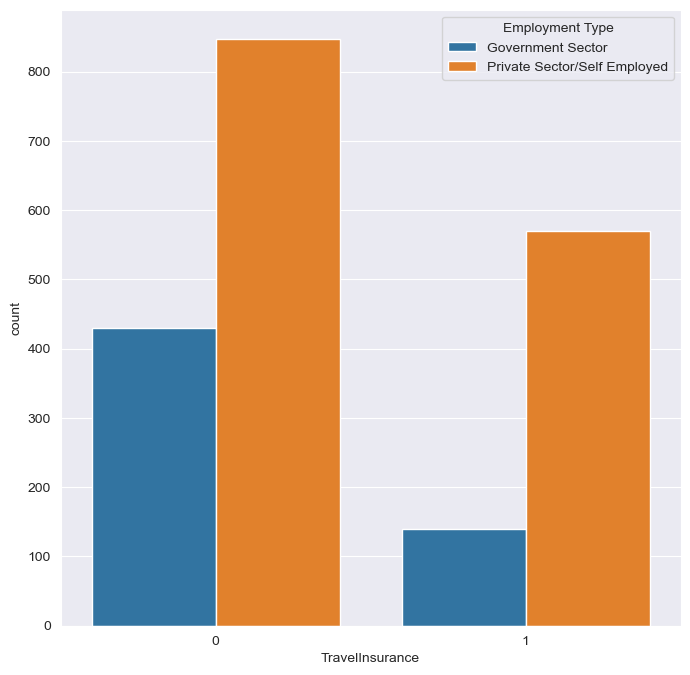

In [68]:
#breakdown of purchase by age
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Employment Type',x='TravelInsurance',data=data)
plt.show()

#does not show clear trend, let's have a look at percentage instead

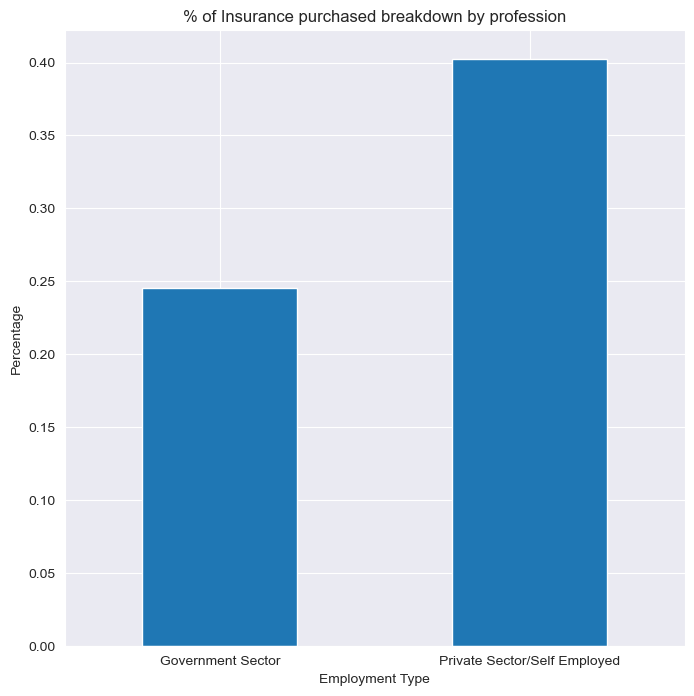

In [69]:
#percentage of purchase by profession
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('Employment Type').sum()['TravelInsurance']/data.groupby('Employment Type').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by profession')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.show()

#seems to be the case that private sector has a higher likelihood to buy insurance
#makes sense since government employees probably enjoy more benefits

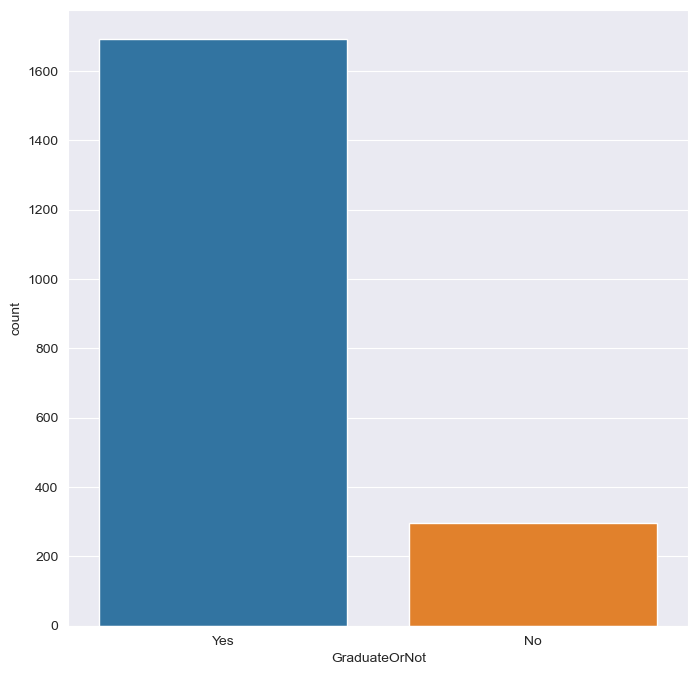

In [70]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='GraduateOrNot')
plt.show()

#vast majority graduated

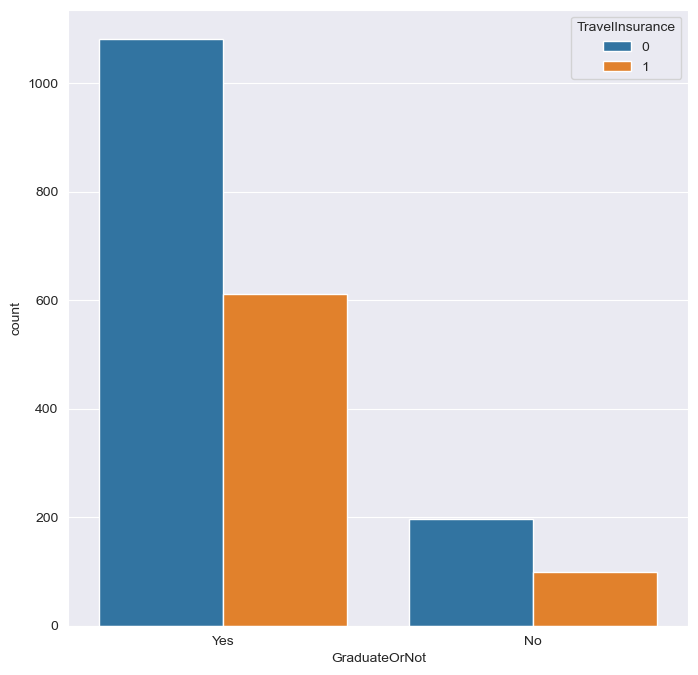

In [71]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='GraduateOrNot',hue='TravelInsurance')
plt.show()

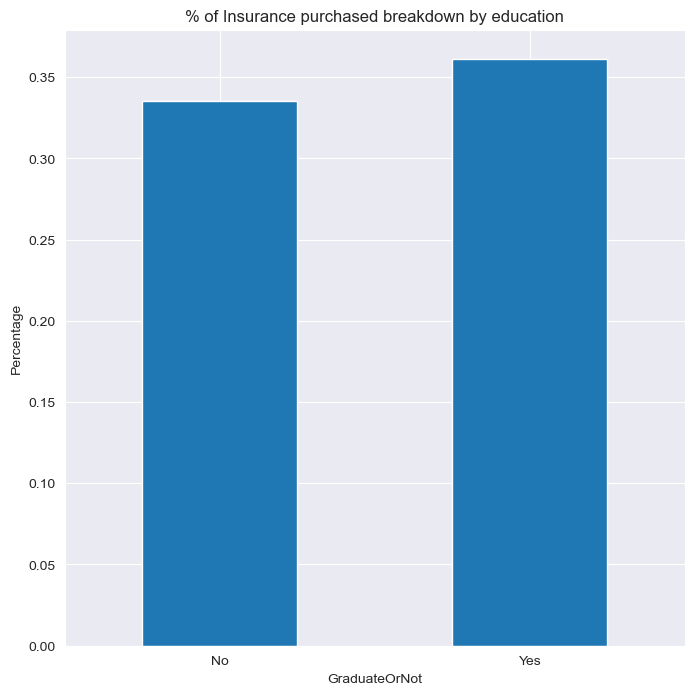

In [72]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('GraduateOrNot').sum()['TravelInsurance']/data.groupby('GraduateOrNot').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by education')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.show()

#does not seem to have vast contrast as to whether education affect insurance purchase or not


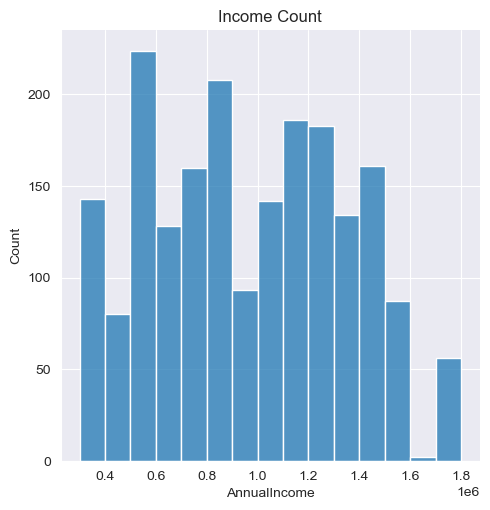

In [73]:
sns.displot(data['AnnualIncome'])
plt.title('Income Count')
plt.show()

In [74]:
data['AnnualIncome'].describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

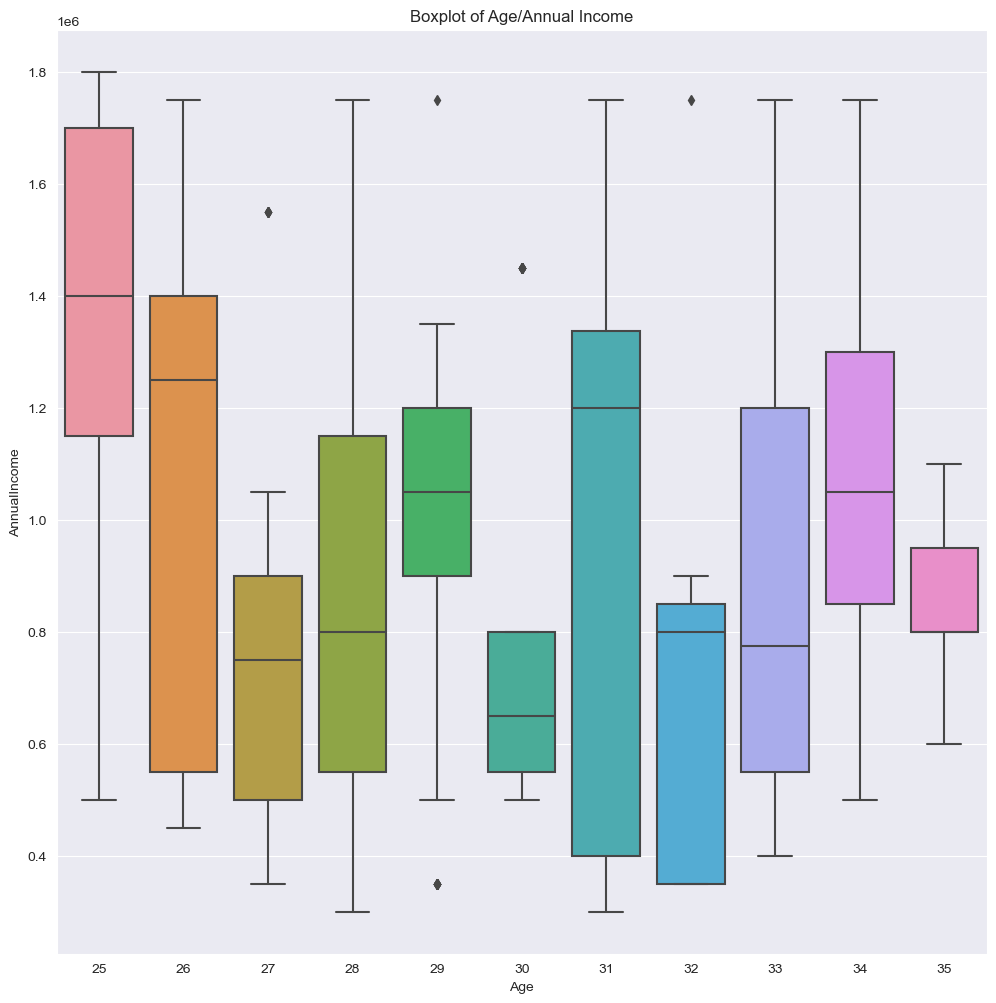

In [75]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='Age',y='AnnualIncome',data=data)
plt.title('Boxplot of Age/Annual Income')
plt.show()

#top earners seem to be 25 years old

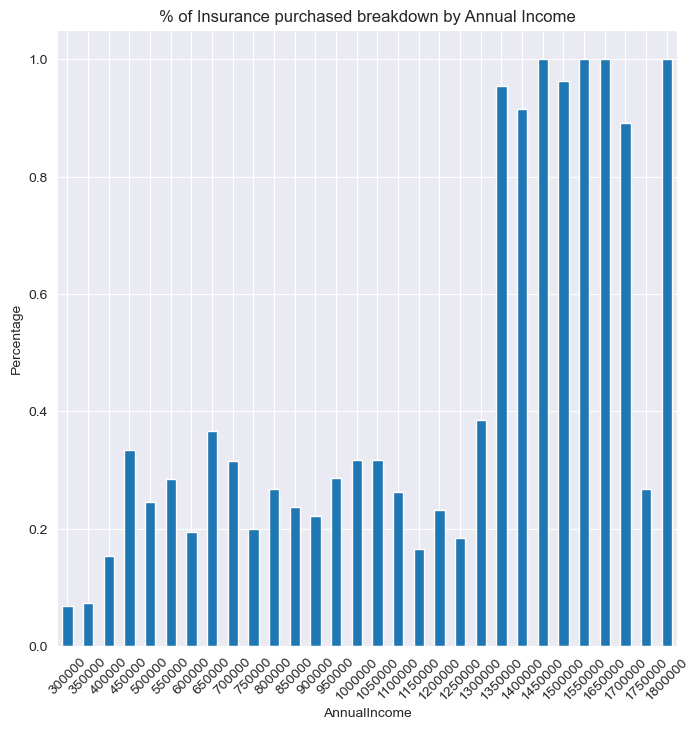

In [76]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('AnnualIncome').sum()['TravelInsurance']/data.groupby('AnnualIncome').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by Annual Income')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

#those with higher income has a higher likelihood of buying travel insurance

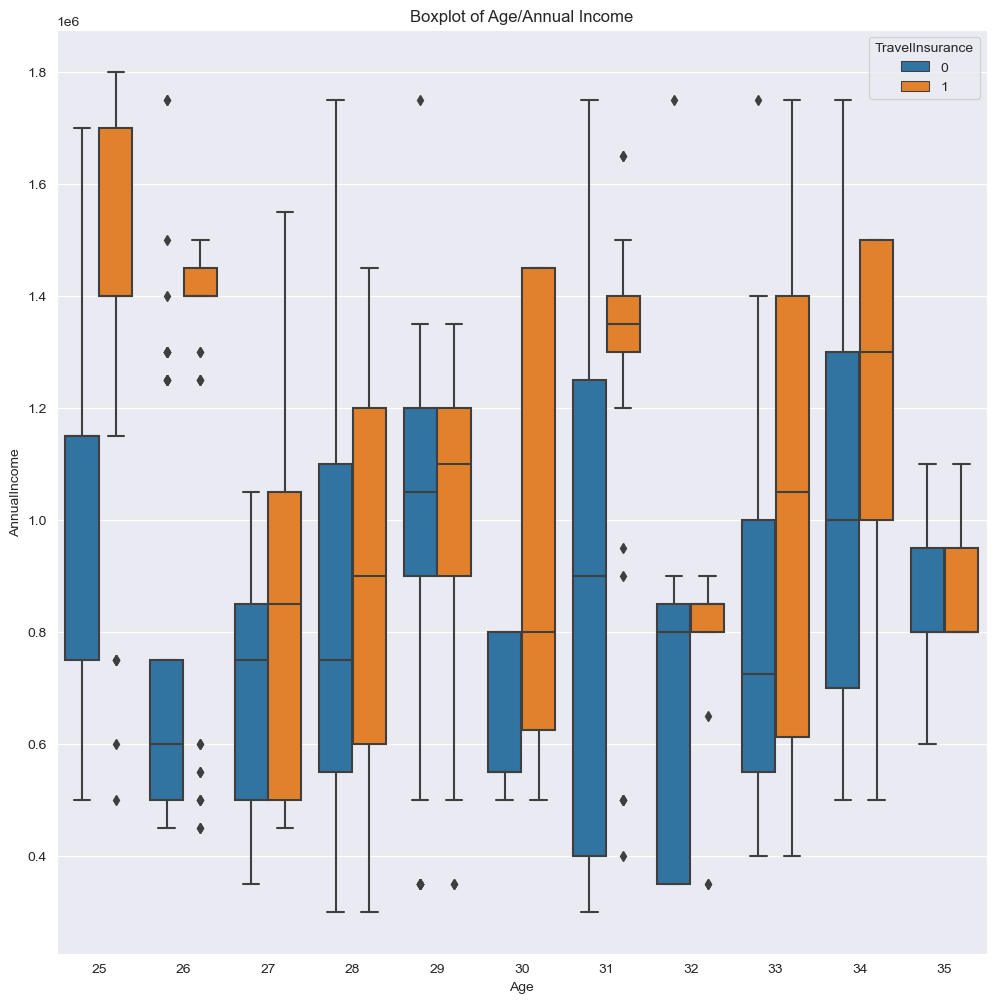

In [77]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='Age',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.title('Boxplot of Age/Annual Income')
plt.show()

#it seems that within each age group, the higher income earners seem to want to purchase insurance

In [78]:
data['FamilyMembers'].unique()

array([6, 7, 4, 3, 8, 9, 5, 2])

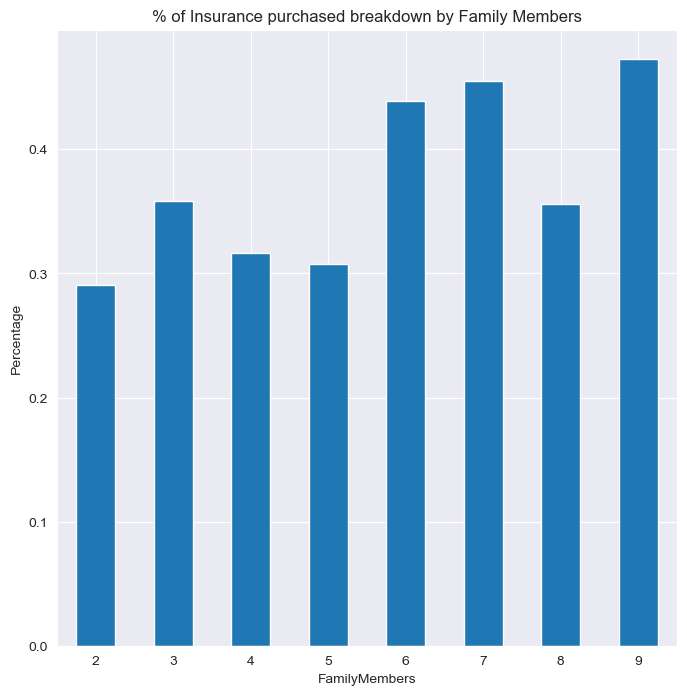

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('FamilyMembers').sum()['TravelInsurance']/data.groupby('FamilyMembers').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by Family Members')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.show()

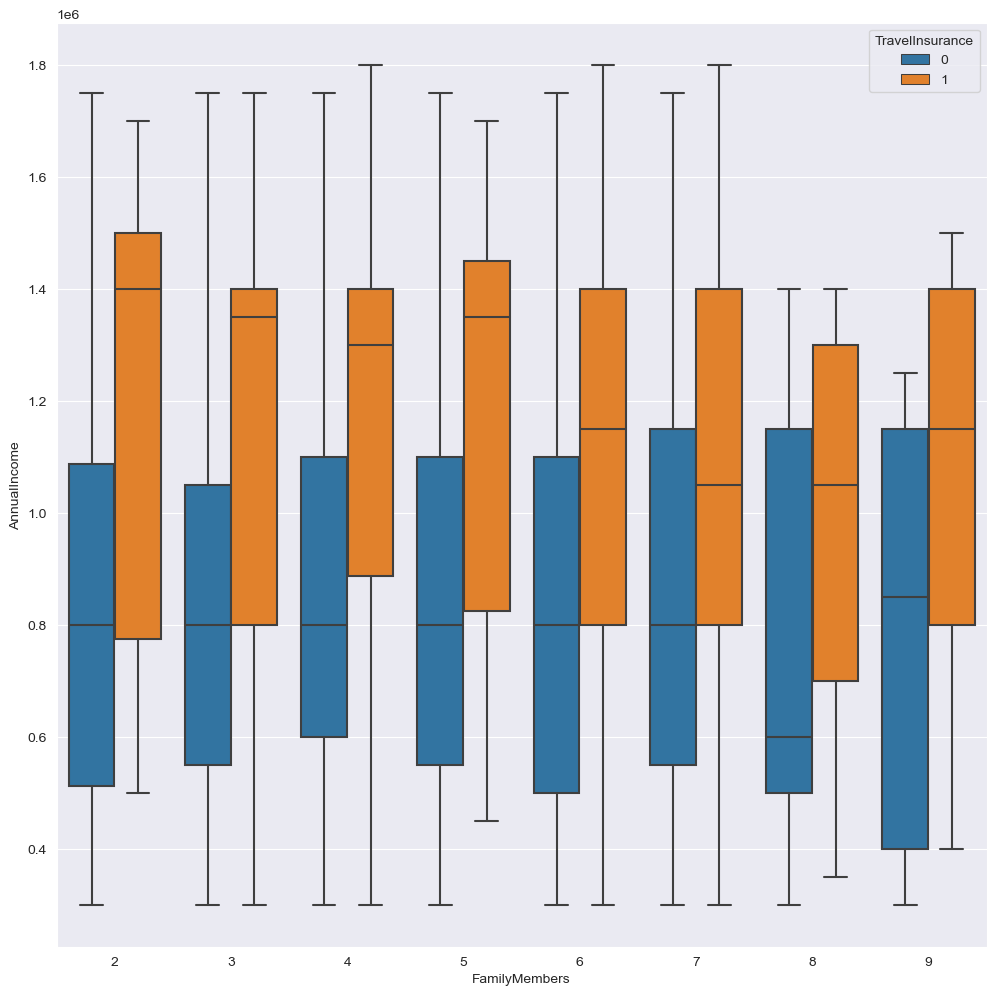

In [80]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='FamilyMembers',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.show()


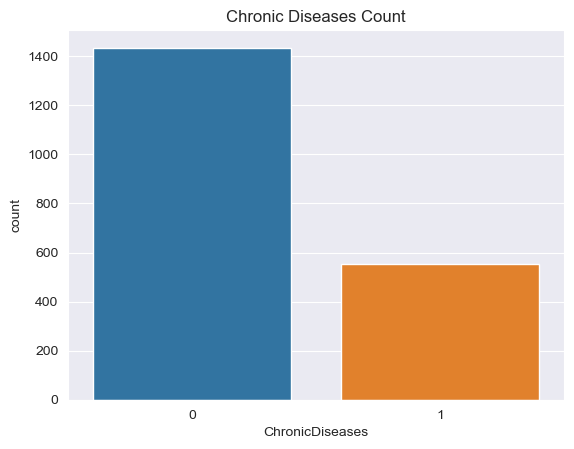

In [81]:
sns.countplot(data=data,x='ChronicDiseases')
plt.title('Chronic Diseases Count')
plt.show()

#more people have chronic diseases than those who do not

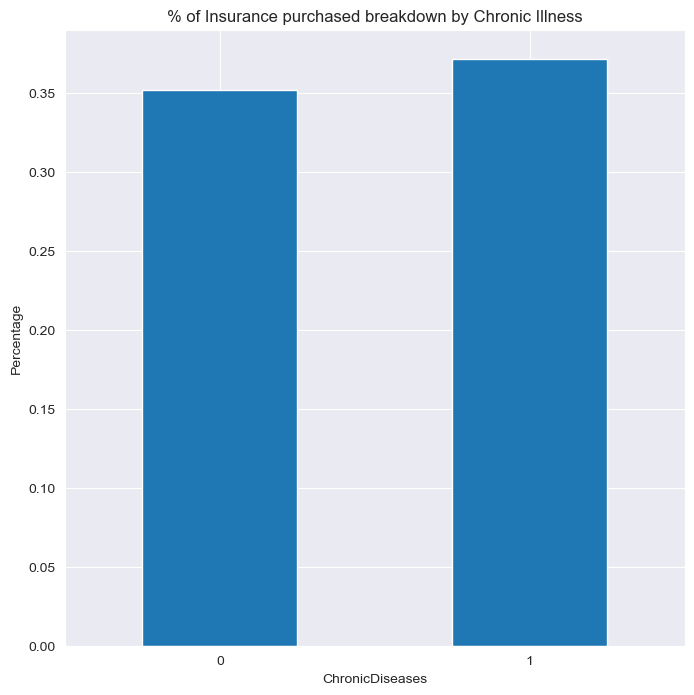

In [82]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('ChronicDiseases').sum()['TravelInsurance']/data.groupby('ChronicDiseases').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by Chronic Illness')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.show()

In [83]:
sns.countplot(data=data,x='FrequentFlyer')

#more non-fequent flyer than frequent

<AxesSubplot:xlabel='FrequentFlyer', ylabel='count'>

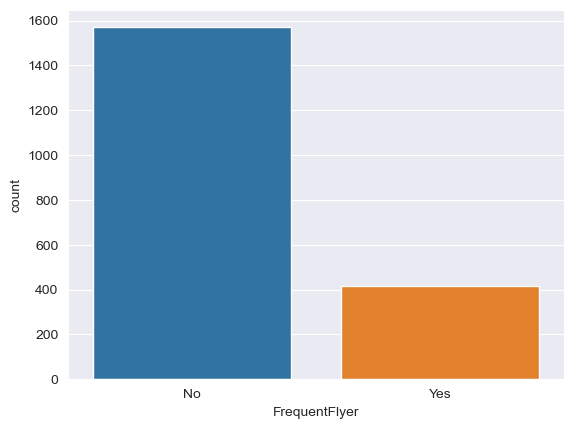

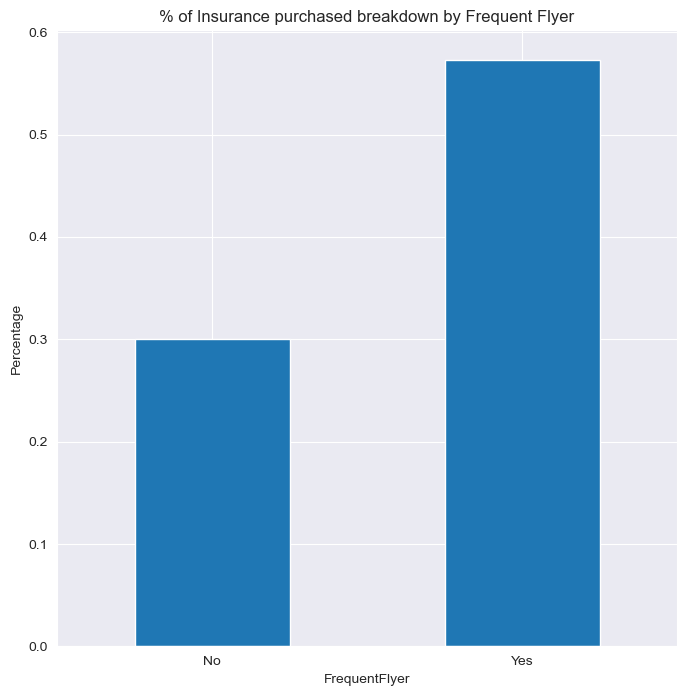

In [84]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('FrequentFlyer').sum()['TravelInsurance']/data.groupby('FrequentFlyer').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by Frequent Flyer')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.show()

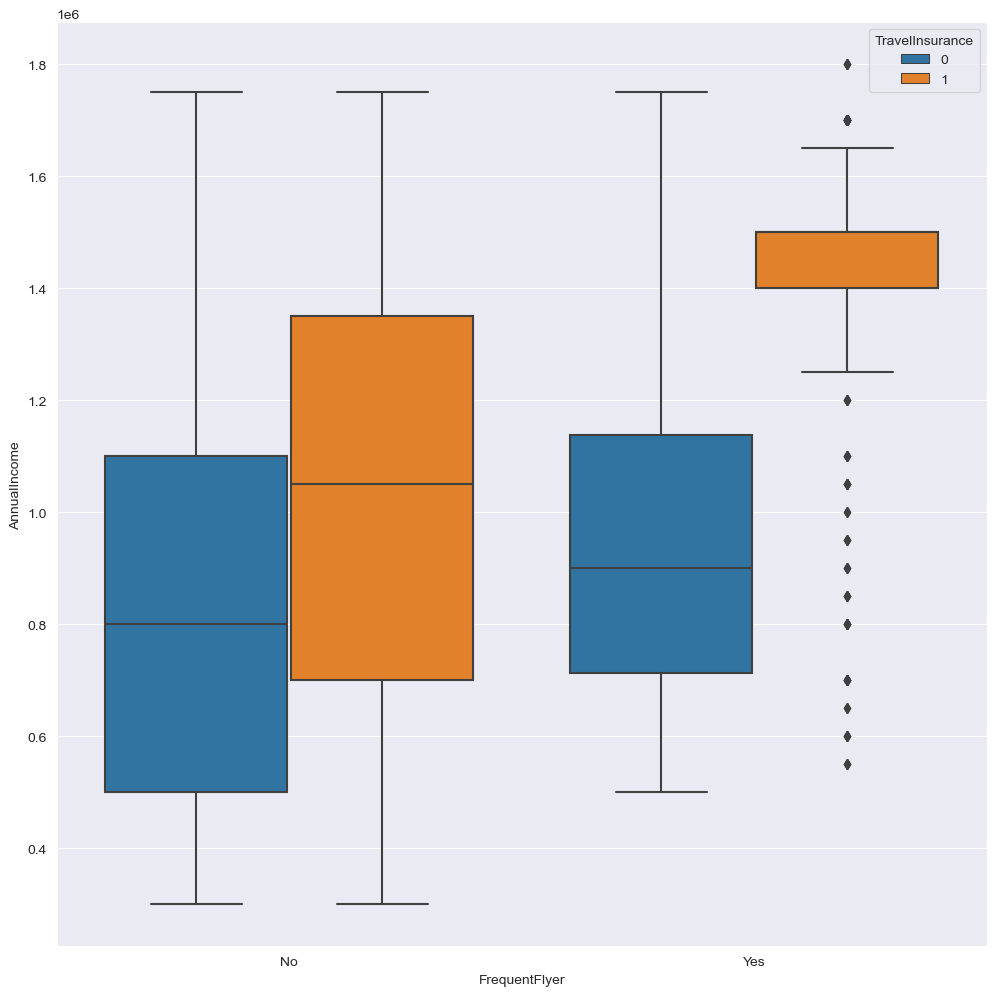

In [85]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='FrequentFlyer',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.show()

#again, income seems to be the driving factor of purchase

In [86]:
data['EverTravelledAbroad']

0        No
1        No
2        No
3        No
4        No
       ... 
1982    Yes
1983    Yes
1984     No
1985    Yes
1986     No
Name: EverTravelledAbroad, Length: 1987, dtype: object

In [87]:
sns.countplot(data=data,x='EverTravelledAbroad')
#Many of whom have not travelled abroad

<AxesSubplot:xlabel='EverTravelledAbroad', ylabel='count'>

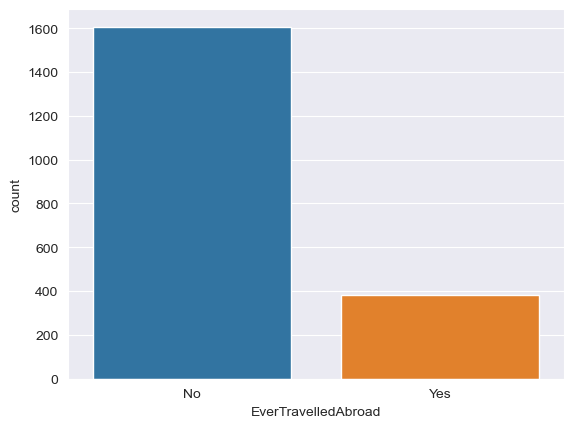

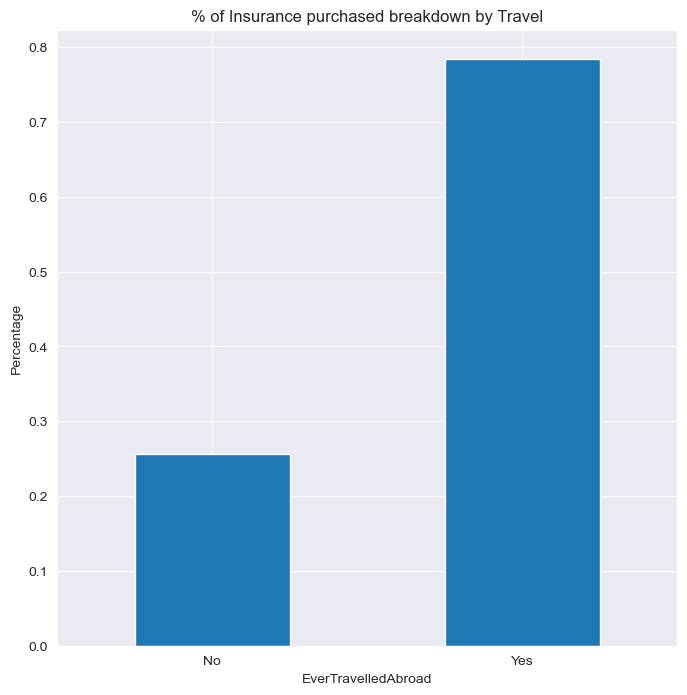

In [88]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('EverTravelledAbroad').sum()['TravelInsurance']/data.groupby('EverTravelledAbroad').count()['TravelInsurance']).plot(kind='bar') #sum = all 1s added togeter / by count which is all counts of that age
plt.title('% of Insurance purchased breakdown by Travel')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.show()

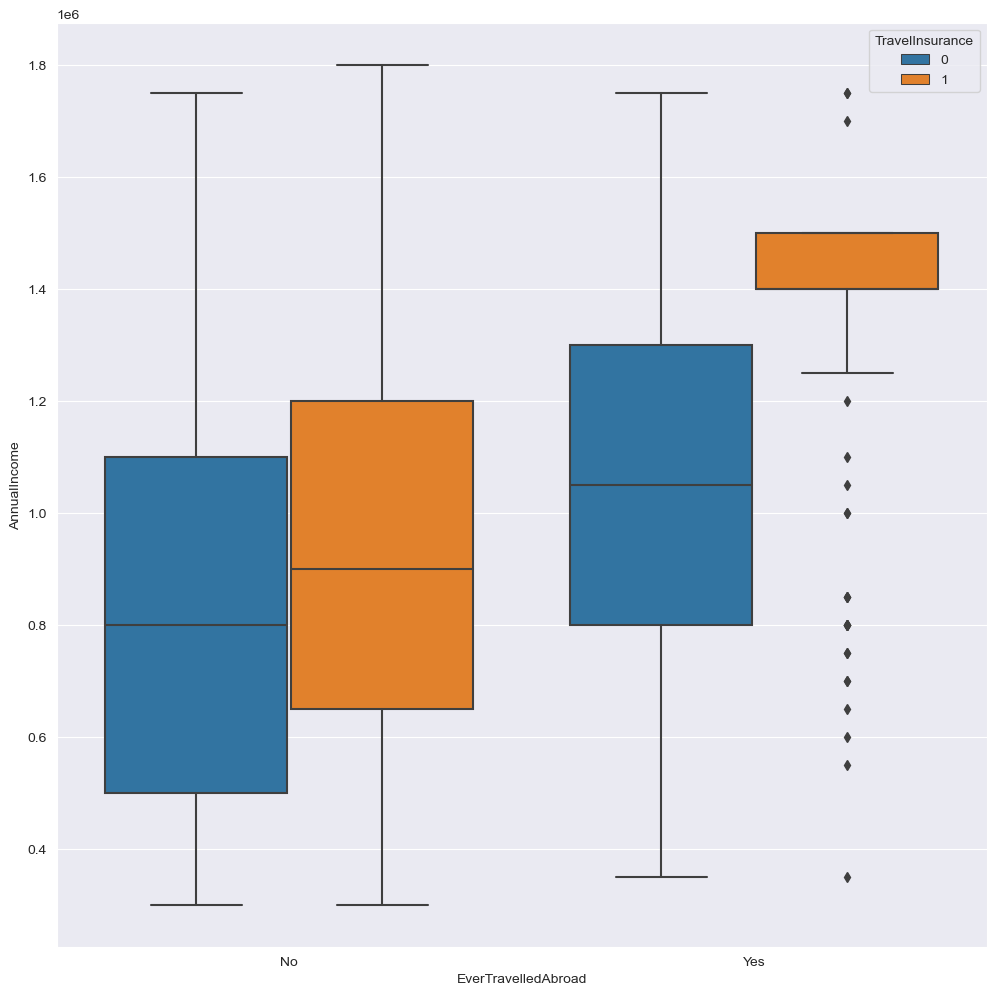

In [89]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='EverTravelledAbroad',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.show()